### Inputs:
- Four CSV files containing region density scores for mA and mC in young and old passaged regions. These are files are the direct output of the density calculation script. 
  - Files:
    - Young islands in young passaged cells mA density mA file 
    - Young islands in young passaged cells mA density mCG file 
    - Young islands in old passaged cells mA density mA file 
    -  Young islands in old passaged cells mA density mCG file 

### Outputs:
- Merged DataFrame containing original and new density data with additional columns for density differences.
  - Columns: `chromosome`, `region`, `mA_density`, `mC_density`, `old_mA_density`, `old_mC_density`, `delta_mA_density`, `delta_mC_density`
  - Example:
    ```python
    {
        'chromosome': ['chr1'],
        'region': ['[1000, 2000]'],
        'mA_density': [0.1],
        'mC_density': [0.2],
        'old_mA_density': [0.15],
        'old_mC_density': [0.25],
        'delta_mA_density': [0.05],
        'delta_mC_density': [0.05]
    }
    ```

### Description:
This script reads four CSV files containing region density scores for mA and mC in young and old passaged regions. It renames columns for clarity and merges the DataFrames based on chromosome and region. The script then calculates the differences in mA and mC densities between the young and old passaged regions, adding two new columns (`delta_mA_density` and `delta_mC_density`) to the merged DataFrame.

The script plots the original mA densities against the changes in mC densities between young and old passaged regions. The plot is customized with a title, axis labels, a grid, and a legend, and is displayed using `plt.show()`.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         chromosome                region  mA_density  mC_density  \
0    chr10_MATERNAL  [42150884, 42214295]    0.006058    0.660753   
1    chr10_MATERNAL  [42277197, 42281736]    0.017502    0.163683   
2    chr10_PATERNAL  [41449687, 41453209]    0.009606    0.630036   
3    chr10_PATERNAL  [41458568, 41462117]    0.017140    0.248585   
4    chr10_PATERNAL  [41470849, 41479759]    0.010442    0.477410   
..              ...                   ...         ...         ...   
202   chrX_MATERNAL  [59267219, 59281201]    0.006762    0.548305   
203   chrX_MATERNAL  [59293165, 59358368]    0.006152    0.582731   
204   chrX_MATERNAL  [59369268, 59422135]    0.008000    0.554490   
205   chrX_MATERNAL  [59446739, 59465035]    0.010853    0.538916   
206   chrX_MATERNAL  [59476699, 59483830]    0.013570    0.461634   

     old_mA_density  old_mC_density  delta_mA_density  delta_mC_density  
0          0.009031        0.451233          0.002973         -0.209519  
1          0.016940    

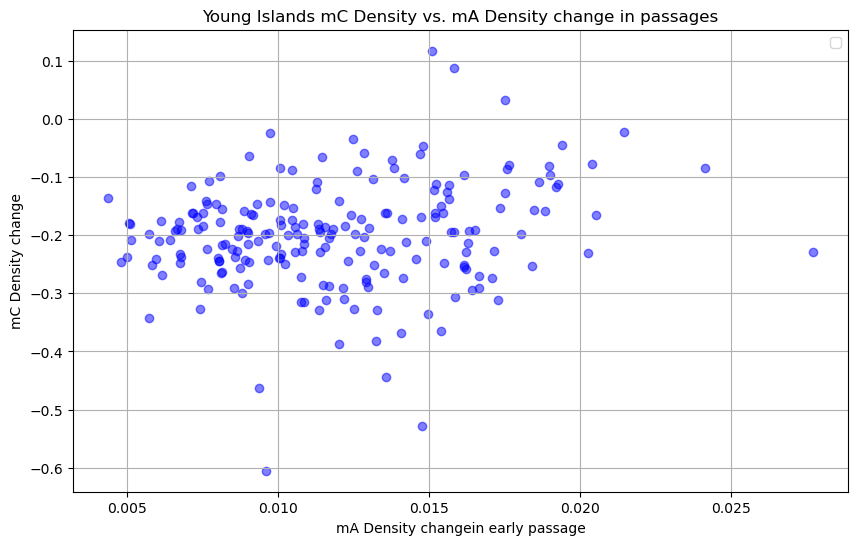

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
ma_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_young_passaged_region_density_scores_A.csv', sep='\t')
mc_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_young_passaged_region_density_scores_CG.csv', sep='\t')
old_ma_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_old_passaged_region_density_scores_A.csv', sep='\t')
old_mc_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_old_passaged_region_density_scores_CG.csv', sep='\t')

# Rename columns for clarity
ma_df.columns = ['chromosome', 'region', 'mA_density', 'position']
mc_df.columns = ['chromosome', 'region', 'mC_density', 'position']
old_ma_df.columns = ['chromosome', 'region', 'old_mA_density', 'position']
old_mc_df.columns = ['chromosome', 'region', 'old_mC_density', 'position']

# Merge the dataframes on chromosome and region
merged_df = pd.merge(ma_df[['chromosome', 'region', 'mA_density']],
                     mc_df[['chromosome', 'region', 'mC_density']],
                     on=['chromosome', 'region'])

merged_new_df = pd.merge(old_ma_df[['chromosome', 'region', 'old_mA_density']],
                         old_mc_df[['chromosome', 'region', 'old_mC_density']],
                         on=['chromosome', 'region'])

# Merge the original and new density data
merged_all_df = pd.merge(merged_df, merged_new_df, on=['chromosome', 'region'])

# Generate two new columns for the differences
merged_all_df['delta_mA_density'] = merged_all_df['old_mA_density'] - merged_all_df['mA_density']
merged_all_df['delta_mC_density'] = merged_all_df['old_mC_density'] - merged_all_df['mC_density']

# Print the final merged dataframe
print(merged_all_df)

# Plotting code
plt.figure(figsize=(10, 6))

# Plot original densities
plt.scatter(merged_all_df['mA_density'], merged_all_df['delta_mC_density'], alpha=0.5, color='blue')


plt.title('Young Islands mC Density vs. mA Density change in passages')
plt.xlabel('mA Density changein early passage')
plt.ylabel('mC Density change')
plt.grid(True)
plt.legend()
plt.show()


### Inputs:
- Two CSV files containing region density scores for mA and mC in young passaged regions. These files are the direct output of the density calculation script.
  - Files:
    - Young islands in young passaged cells mA density mA file
    - Young islands in young passaged cells mA density mCG file

### Outputs:
- Merged DataFrame containing mA and mC density data with an additional column for region length.
  - Columns: `chromosome`, `region`, `mA_density`, `mC_density`, `length`
  - Example:
    ```python
    {
        'chromosome': ['chr1'],
        'region': ['[1000, 2000]'],
        'mA_density': [0.1],
        'mC_density': [0.2],
        'length': [1000]
    }
    ```

### Description:
This script reads two CSV files containing region density scores for mA and mC in young passaged regions. It renames columns for clarity and merges the DataFrames based on chromosome and region. The script includes a function `process_region` to calculate the length of each region from the 'region' column and applies this function to create a new 'length' column in the merged DataFrame.

The script plots the mA density against the length of the regions for young islands in young passaged cells. The plot is customized with a title, axis labels, a y-axis limit of 50,000, and a grid. The plot is displayed using `plt.show()`.


       chromosome                region  mA_density  mC_density  length
0  chr10_MATERNAL  [42150884, 42214295]    0.006058    0.660753   63411
1  chr10_MATERNAL  [42277197, 42281736]    0.017502    0.163683    4539
2  chr10_PATERNAL  [41449687, 41453209]    0.009606    0.630036    3522
3  chr10_PATERNAL  [41458568, 41462117]    0.017140    0.248585    3549
4  chr10_PATERNAL  [41470849, 41479759]    0.010442    0.477410    8910


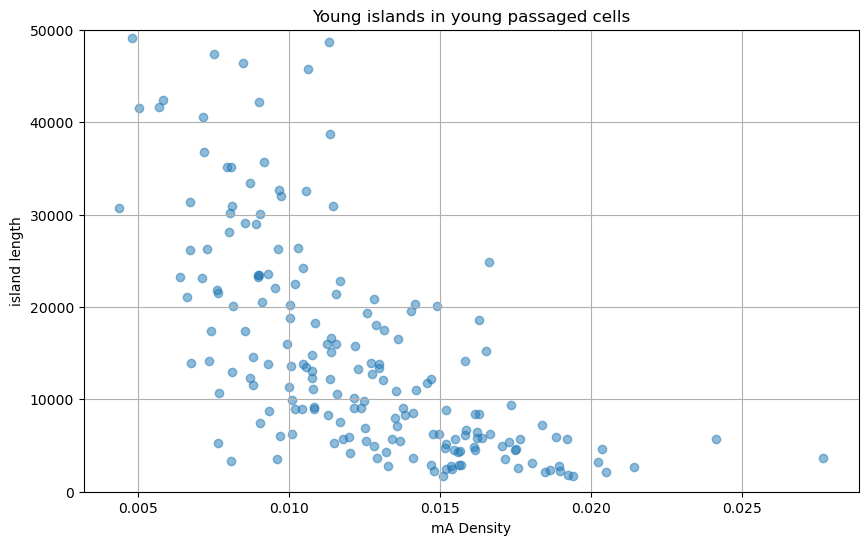

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
ma_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_young_passaged_region_density_scores_A.csv', sep='\t')
mc_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_young_passaged_region_density_scores_CG.csv', sep='\t')

# Rename columns for clarity
ma_df.columns = ['chromosome', 'region', 'mA_density', 'position']
mc_df.columns = ['chromosome', 'region', 'mC_density', 'position']

# Merge the dataframes on chromosome and region
merged_df = pd.merge(ma_df[['chromosome', 'region', 'mA_density']],
                     mc_df[['chromosome', 'region', 'mC_density']],
                     on=['chromosome', 'region'])

# Function to process the region column
def process_region(region_str):
    try:
        # Remove "[" and "]" and split by ","
        region_str = region_str.strip("[]").replace("'", "").split(',')
        # Convert to integers and calculate the difference
        start, end = int(region_str[0].strip()), int(region_str[1].strip())
        return end - start
    except Exception as e:
        print(f"Error processing region string: {region_str}")
        print(e)
        return None

# Apply the function to the 'region' column and create a new column 'length'
merged_df['length'] = merged_df['region'].apply(process_region)

# Display the merged dataframe to verify
print(merged_df.head())

# Plotting code
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['mA_density'], merged_df['length'], alpha=0.5)
plt.title('Young islands in young passaged cells')
plt.xlabel('mA Density')
plt.ylabel('island length')
plt.ylim(0, 50000)  # Set y-axis limit to 50,000
plt.grid(True)
plt.show()


### Inputs:
- Four CSV files containing region density scores for mA and mC in young and old passaged regions. These files are the direct output of the density calculation script.
  - Files:
    - Young islands in young passaged cells mA density mA file
    - Young islands in young passaged cells mA density mCG file
    - Young islands in old passaged cells mA density mA file
    - Young islands in old passaged cells mA density mCG file

### Outputs:
- Merged DataFrame containing original and new density data with additional columns for region length and density differences.
  - Columns: `chromosome`, `region`, `mA_density`, `mC_density`, `old_mA_density`, `old_mC_density`, `length`, `delta_mA_density`, `delta_mC_density`
  - Example:
    ```python
    {
        'chromosome': ['chr1'],
        'region': ['[1000, 2000]'],
        'mA_density': [0.1],
        'mC_density': [0.2],
        'old_mA_density': [0.15],
        'old_mC_density': [0.25],
        'length': [1000],
        'delta_mA_density': [0.05],
        'delta_mC_density': [0.05]
    }
    ```

### Description:
This script reads four CSV files containing region density scores for mA and mC in young and old passaged regions. It renames columns for clarity and merges the DataFrames based on chromosome and region. The script includes a function `process_region` to calculate the length of each region from the 'region' column and applies this function to create a new 'length' column in the merged DataFrame. Additionally, it calculates the differences in mA and mC densities between the young and old passaged regions, adding two new columns (`delta_mA_density` and `delta_mC_density`) to the merged DataFrame.

The script plots the differences in mC density (`delta_mC_density`) against the length of the regions, highlighting the changes in island length as cells were passaged. The plot is customized with a title, axis labels, and a legend, and is displayed using `plt.show()`.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


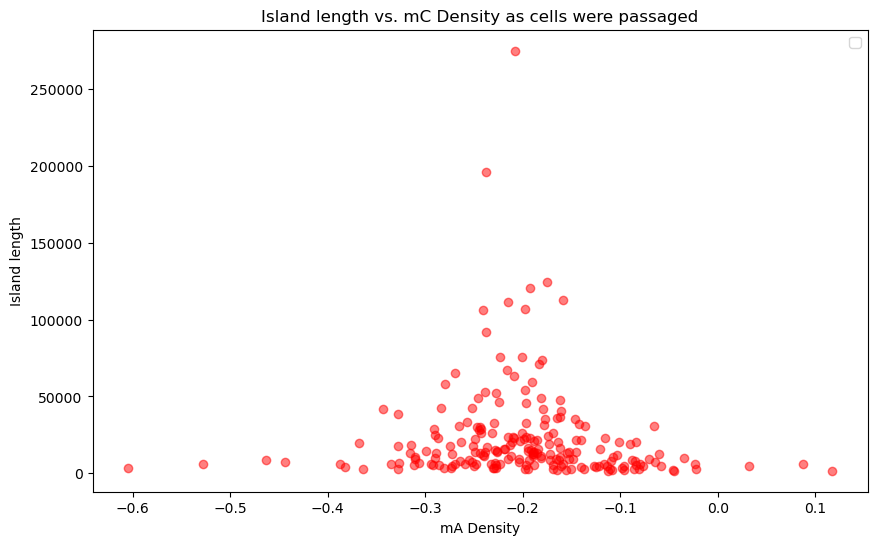

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
ma_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_young_passaged_region_density_scores_A.csv', sep='\t')
mc_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_young_passaged_region_density_scores_CG.csv', sep='\t')
old_ma_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_old_passaged_region_density_scores_A.csv', sep='\t')
old_mc_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_old_passaged_region_density_scores_CG.csv', sep='\t')

# Rename columns for clarity
ma_df.columns = ['chromosome', 'region', 'mA_density', 'position']
mc_df.columns = ['chromosome', 'region', 'mC_density', 'position']
old_ma_df.columns = ['chromosome', 'region', 'old_mA_density', 'position']
old_mc_df.columns = ['chromosome', 'region', 'old_mC_density', 'position']

# Merge the dataframes on chromosome and region
merged_df = pd.merge(ma_df[['chromosome', 'region', 'mA_density']],
                     mc_df[['chromosome', 'region', 'mC_density']],
                     on=['chromosome', 'region'])

merged_new_df = pd.merge(old_ma_df[['chromosome', 'region', 'old_mA_density']],
                         old_mc_df[['chromosome', 'region', 'old_mC_density']],
                         on=['chromosome', 'region'])

# Merge the original and new density data
merged_all_df = pd.merge(merged_df, merged_new_df, on=['chromosome', 'region'])
# Function to process the region column
def process_region(region_str):
    try:
        # Remove "[" and "]" and split by ","
        region_str = region_str.strip("[]").replace("'", "").split(',')
        # Convert to integers and calculate the difference
        start, end = int(region_str[0].strip()), int(region_str[1].strip())
        return end - start
    except Exception as e:
        print(f"Error processing region string: {region_str}")
        print(e)
        return None

# Apply the function to the 'region' column and create a new column 'length'
merged_all_df['length'] = merged_all_df['region'].apply(process_region)
# Generate two new columns for the differences
merged_all_df['delta_mA_density'] = merged_all_df['old_mA_density'] - merged_all_df['mA_density']
merged_all_df['delta_mC_density'] = merged_all_df['old_mC_density'] - merged_all_df['mC_density']


# Plotting code
plt.figure(figsize=(10, 6))

# Plot original densities
plt.scatter(merged_all_df['delta_mC_density'], merged_all_df['length'], alpha=0.5, color='red')




plt.title('Island length vs. mC Density as cells were passaged')
plt.xlabel('mA Density')
plt.ylabel('Island length')
plt.legend()
plt.show()


       chromosome                region  mA_density  mC_density  length
0  chr10_MATERNAL  [42150884, 42214295]    0.009031    0.451233   63411
1  chr10_MATERNAL  [42277197, 42281736]    0.016940    0.196195    4539
2  chr10_PATERNAL  [41449687, 41453209]    0.025336    0.024863    3522
3  chr10_PATERNAL  [41458568, 41462117]    0.022852    0.020995    3549
4  chr10_PATERNAL  [41470849, 41479759]    0.016809    0.389784    8910


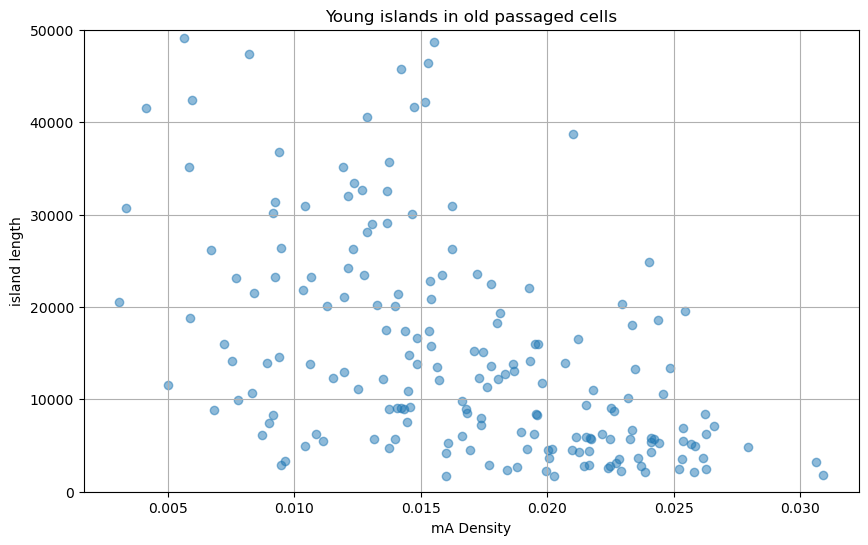

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
ma_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_old_passaged_region_density_scores_A.csv', sep='\t')
mc_df = pd.read_csv('/private/groups/migalab/dan/data_analysis/young_old_analysis/old_passaged_islands_comparison/young_islands_in_old_passaged_region_density_scores_CG.csv', sep='\t')

# Rename columns for clarity
ma_df.columns = ['chromosome', 'region', 'mA_density', 'position']
mc_df.columns = ['chromosome', 'region', 'mC_density', 'position']

# Merge the dataframes on chromosome and region
merged_df = pd.merge(ma_df[['chromosome', 'region', 'mA_density']],
                     mc_df[['chromosome', 'region', 'mC_density']],
                     on=['chromosome', 'region'])

# Function to process the region column
def process_region(region_str):
    try:
        # Remove "[" and "]" and split by ","
        region_str = region_str.strip("[]").replace("'", "").split(',')
        # Convert to integers and calculate the difference
        start, end = int(region_str[0].strip()), int(region_str[1].strip())
        return end - start
    except Exception as e:
        print(f"Error processing region string: {region_str}")
        print(e)
        return None

# Apply the function to the 'region' column and create a new column 'length'
merged_df['length'] = merged_df['region'].apply(process_region)

# Display the merged dataframe to verify
print(merged_df.head())

# Plotting code
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['mA_density'], merged_df['length'], alpha=0.5)
plt.title('Young islands in old passaged cells')
plt.xlabel('mA Density')
plt.ylabel('island length')
plt.ylim(0, 50000)  # Set y-axis limit to 50,000
plt.grid(True)
plt.show()
